##<h1><center>**Melanoma Detection**</center></h1>

### **1. Problem Statement:**

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


The data set contains the following diseases:

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion


### **2. Importing libraries**

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import tensorflow as tf
import os
import PIL
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory


#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [68]:
# Connecting to Google Drive for accessing the dataset

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **3. Importing Dataset**

In [69]:
# Defining path for train and test data

train_directory = pathlib.Path('/content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
test_directory = pathlib.Path('/content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [70]:
image_count_train = len(list(train_directory.glob('*/*.jpg')))
image_count_test = len(list(test_directory.glob('*/*.jpg')))

print('Number of images in train data set: ',image_count_train)
print('Number of images in test data set: ',image_count_test)

Number of images in train data set:  2239
Number of images in test data set:  118


In [71]:
# Defining parameter for loading Keras

batch_size = 32
img_height = 180
img_width = 180

In [72]:
# Using 80% of the images for training the model and 20% for validation

train_set = image_dataset_from_directory(train_directory,
                                         batch_size=batch_size,
                                         image_size=(img_height,img_width),
                                         label_mode='categorical',
                                         seed=123,
                                         validation_split=0.2,
                                         subset='training',
                                         shuffle=True)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [73]:
validation_set = image_dataset_from_directory(train_directory,
                                         batch_size=batch_size,
                                         image_size=(img_height,img_width),
                                         label_mode='categorical',
                                         seed=123,
                                         validation_split=0.2,
                                         subset='validation',
                                         shuffle=True)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [74]:
test_set = image_dataset_from_directory(test_directory,
                                        batch_size=batch_size,
                                        image_size=(img_height,img_width))

Found 118 files belonging to 9 classes.


In [75]:
class_names = train_set.class_names
print('The different classes of Skin Cancer present the dataset: ')
print(class_names)

The different classes of Skin Cancer present the dataset: 
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### **4. Visualizing Data**

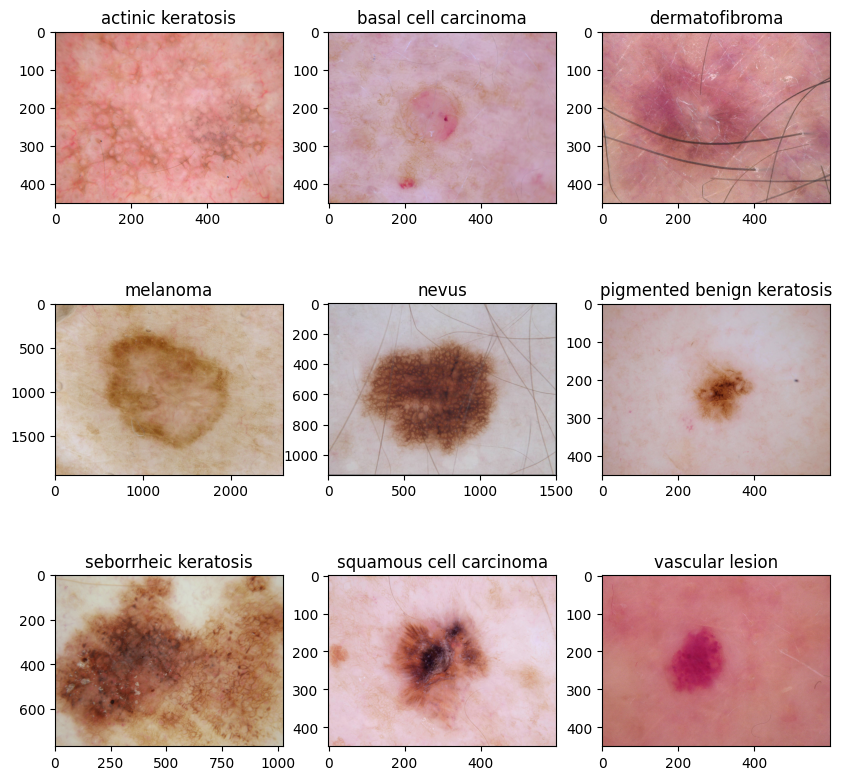

In [76]:
# Visualizing 1st instance of every class in the data

plt.figure(figsize=(10,10))
for i in range(len(class_names)):
  plt.subplot(3,3,i+1)
  image= plt.imread(str(list(train_directory.glob(class_names[i]+'/*.jpg'))[0]))
  plt.title(class_names[i])
  plt.imshow(image)

The image_batch is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [77]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_set = validation_set.cache().prefetch(buffer_size=AUTOTUNE)

### **5. Creating a CNN model, to accurately detect 9 classes present in the dataset.**

### 5.1 Model 1: 3 Conv2D layers without droput layers

In [78]:
model= Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(img_height,img_width,3)))

# Convolution layer with 32 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(len(class_names),activation='softmax'))

In [79]:
# Compiling the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 45, 45, 128)      

### Training the model

In [80]:
epochs = 20
history = model.fit(
  train_set,
  validation_data=validation_set,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 23s 129ms/step - loss: 2.2423 - accuracy: 0.2400 - val_loss: 1.6812 - val_accuracy: 0.3893
Epoch 2/20
56/56 [==============================] - 2s 37ms/step - loss: 1.7163 - accuracy: 0.3783 - val_loss: 1.4750 - val_accuracy: 0.5078
Epoch 3/20
56/56 [==============================] - 2s 40ms/step - loss: 1.4725 - accuracy: 0.4844 - val_loss: 1.4686 - val_accuracy: 0.5034
Epoch 4/20
56/56 [==============================] - 2s 37ms/step - loss: 1.3033 - accuracy: 0.5396 - val_loss: 1.4261 - val_accuracy: 0.5324
Epoch 5/20
56/56 [==============================] - 2s 36ms/step - loss: 1.2577 - accuracy: 0.5653 - val_loss: 1.3977 - val_accuracy: 0.5503
Epoch 6/20
56/56 [==============================] - 2s 39ms/step - loss: 1.1454 - accuracy: 0.5915 - val_loss: 1.4204 - val_accuracy: 0.5213
Epoch 7/20
56/56 [==============================] - 2s 36ms/step - loss: 1.0800 - accuracy: 0.6205 - val_loss: 1.4155 - val_accuracy: 0.5145
Epoch 8/20


### Visualizing training results

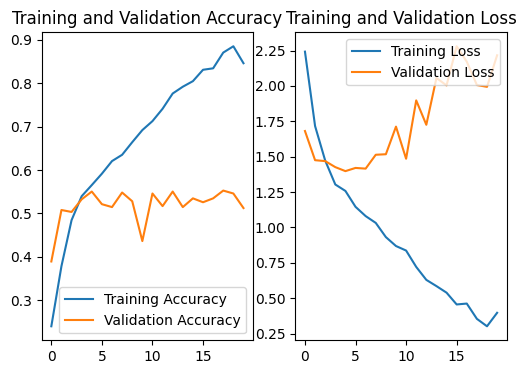

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Model 1 Findings:
1. As the number of epoches increase, the training accuracy is also increasing 
2. The model is overfitting the data since the validation accuracy is much lower when compared to the training accuracy
3. Hence, we will tune the model ie., reduce the model complexity by using the dropout layes afte each convolutional layer

### **5.2 Model 2: 3 Conv2D layers with droput layers**

In [82]:
model= Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(img_height,img_width,3)))

# Convolution layer with 32 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))

model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(class_names),activation='softmax'))

In [83]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 90, 90, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                 

### Training the model

In [84]:
epochs = 20
history = model.fit(
  train_set,
  validation_data=validation_set,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 66ms/step - loss: 2.1931 - accuracy: 0.1825 - val_loss: 2.0605 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 3s 62ms/step - loss: 1.9595 - accuracy: 0.2533 - val_loss: 1.8073 - val_accuracy: 0.3378
Epoch 3/20
56/56 [==============================] - 4s 66ms/step - loss: 1.7109 - accuracy: 0.3795 - val_loss: 1.6327 - val_accuracy: 0.4183
Epoch 4/20
56/56 [==============================] - 3s 62ms/step - loss: 1.6251 - accuracy: 0.4129 - val_loss: 1.6022 - val_accuracy: 0.3893
Epoch 5/20
56/56 [==============================] - 3s 62ms/step - loss: 1.6061 - accuracy: 0.4263 - val_loss: 1.5745 - val_accuracy: 0.4362
Epoch 6/20
56/56 [==============================] - 4s 65ms/step - loss: 1.5335 - accuracy: 0.4643 - val_loss: 1.5002 - val_accuracy: 0.4855
Epoch 7/20
56/56 [==============================] - 3s 61ms/step - loss: 1.4896 - accuracy: 0.4743 - val_loss: 1.6042 - val_accuracy: 0.4586
Epoch 8/20
56

### Visualizing training results

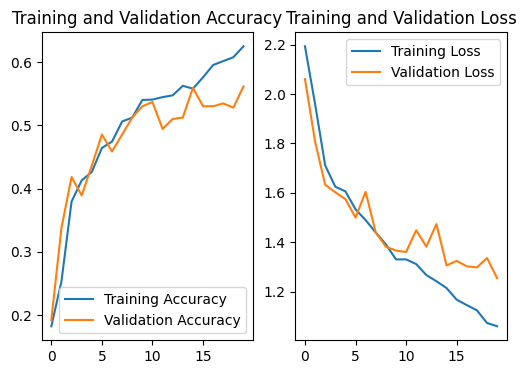

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6,4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###**Model 2 Findings:**
1. The model performance is better with 4 Conv2D layers and with dropouts
2. The model is still underfitting the data since the acuuracy is ~60%

###**6. Distribution of classes in the training dataset**

In [86]:
class_distribution = {class_names[i]:len(list(train_directory.glob(class_names[i]+'/*.jpg'))) for i in range(len(class_names))}

df = pd.DataFrame()

df['Type'] = class_distribution.keys()
df['Num_of_Images'] = class_distribution.values()

df = df.sort_values(by='Num_of_Images',ascending=False)

df

,Type,Num_of_Images
5,pigmented benign keratosis,462
3,melanoma,438
1,basal cell carcinoma,376
4,nevus,357
7,squamous cell carcinoma,181
8,vascular lesion,139
0,actinic keratosis,114
2,dermatofibroma,95
6,seborrheic keratosis,77


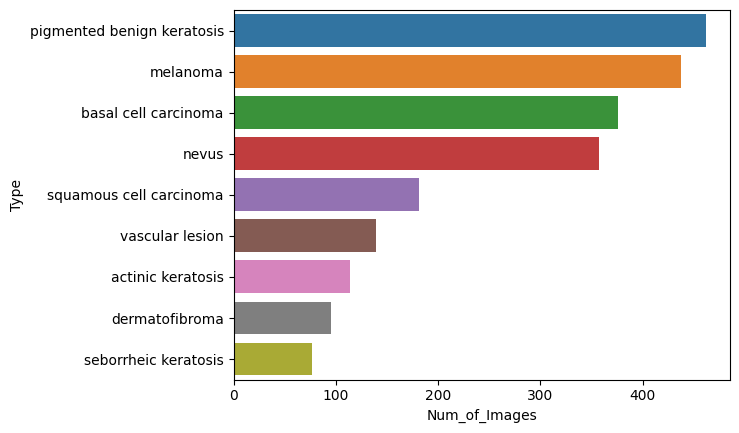

In [87]:
sns.barplot(data=df,y='Type',x='Num_of_Images')
plt.show()

###**Findings:** 

1. It is evident from the above chart that the data set is imbalanced in terms of number of samples belonging to a certain class.
2. `'seborrheic keratosis'` class has least number of samples in the dataset with just 77 samples belonging to the class.
3. `'pigmented benign keratosis'` class dominate the data in terms of proportionate number of samples with 462 samples belonging to the class.

### **7. Rectifying class imbalance with `Augmentor`**

In [88]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Storing the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.

In [89]:
path_to_training_dataset = '/content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  #Adding 500 samples per class to make sure that none of the classes are sparse

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5242D2BC70>: 100%|██████████| 500/500 [00:25<00:00, 19.48 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F51B352B610>: 100%|██████████| 500/500 [00:28<00:00, 17.65 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5242D2BC70>: 100%|██████████| 500/500 [00:26<00:00, 18.98 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F5260816C20>: 100%|██████████| 500/500 [02:03<00:00,  4.06 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F5242D29000>: 100%|██████████| 500/500 [01:48<00:00,  4.60 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F52609CA740>: 100%|██████████| 500/500 [00:22<00:00, 21.85 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F51B37B56C0>: 100%|██████████| 500/500 [00:48<00:00, 10.24 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F51B3745A50>: 100%|██████████| 500/500 [00:23<00:00, 21.66 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F51B3560D60>: 100%|██████████| 500/500 [00:21<00:00, 23.72 Samples/s]


In [90]:
# Augmented images count

image_count_train = len(list(train_directory.glob('*/output/*.jpg')))
print('Total count of Augmented images: ',image_count_train)
     

Total count of Augmented images:  4500


In [91]:
len(list(train_directory.glob('*/output/*.jpg')))

4500

###**8. Distribution of classes in the training dataset after Augmentation**

In [92]:
x=[]
y=[]
for i in range(len(class_names)):
  x.append(class_names[i])
  y.append(len(list(train_directory.glob(class_names[i]+'/*.jpg'))) + len(list(train_directory.glob(class_names[i]+'/output/*.jpg'))))

In [93]:
df = pd.DataFrame({'Type':x,'Num_of_Images':y})

df = df.sort_values(by='Num_of_Images',ascending=False)
df

,Type,Num_of_Images
5,pigmented benign keratosis,962
3,melanoma,938
1,basal cell carcinoma,876
4,nevus,857
7,squamous cell carcinoma,681
8,vascular lesion,639
0,actinic keratosis,614
2,dermatofibroma,595
6,seborrheic keratosis,577


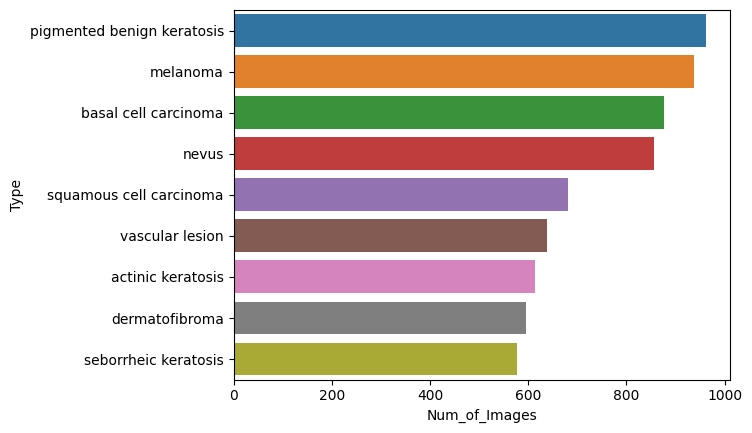

In [94]:
sns.barplot(data=df,x='Num_of_Images',y='Type')
plt.show()

### **9. Re-train the previous model on the data after Augmentation**

In [95]:
batch_size = 32
img_height = 180
img_width = 180

In [96]:
train_directory = pathlib.Path('/content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/')
test_directory = pathlib.Path('/content/drive/MyDrive/Datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [97]:
image_count_train = len(list(train_directory.glob('*/*/*.jpg')))

print('Number of images in Augmented train data set: ',image_count_train)

Number of images in Augmented train data set:  4500


In [98]:
train_set = image_dataset_from_directory(train_directory,
                                         batch_size=batch_size,
                                         image_size=(img_height,img_width),
                                         label_mode='categorical',
                                         seed=123,
                                         validation_split=0.2,
                                         subset='training',
                                         shuffle=True)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [99]:
validation_set = image_dataset_from_directory(train_directory,
                                         batch_size=batch_size,
                                         image_size=(img_height,img_width),
                                         label_mode='categorical',
                                         seed=123,
                                         validation_split=0.2,
                                         subset='validation',
                                         shuffle=True)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [100]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_set = validation_set.cache().prefetch(buffer_size=AUTOTUNE)

In [101]:
model= Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(img_height,img_width,3)))

# Convolution layer with 32 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))

model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(class_names),activation='softmax'))

In [102]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 90, 90, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                 

In [103]:
# Training the model
epochs = 30
history = model.fit(
  train_set,
  validation_data=validation_set,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 64s 109ms/step - loss: 2.1615 - accuracy: 0.1931 - val_loss: 1.8550 - val_accuracy: 0.2984
Epoch 2/30
169/169 [==============================] - 11s 63ms/step - loss: 1.7312 - accuracy: 0.3388 - val_loss: 1.5591 - val_accuracy: 0.4306
Epoch 3/30
169/169 [==============================] - 10s 62ms/step - loss: 1.5096 - accuracy: 0.4214 - val_loss: 1.4168 - val_accuracy: 0.4640
Epoch 4/30
169/169 [==============================] - 11s 64ms/step - loss: 1.3942 - accuracy: 0.4731 - val_loss: 1.2443 - val_accuracy: 0.5293
Epoch 5/30
169/169 [==============================] - 11s 62ms/step - loss: 1.2829 - accuracy: 0.5106 - val_loss: 1.2798 - val_accuracy: 0.5353
Epoch 6/30
169/169 [==============================] - 10s 61ms/step - loss: 1.2113 - accuracy: 0.5375 - val_loss: 1.1922 - val_accuracy: 0.5590
Epoch 7/30
169/169 [==============================] - 10s 61ms/step - loss: 1.0593 - accuracy: 0.5977 - val_loss: 1.0144 - val_accuracy

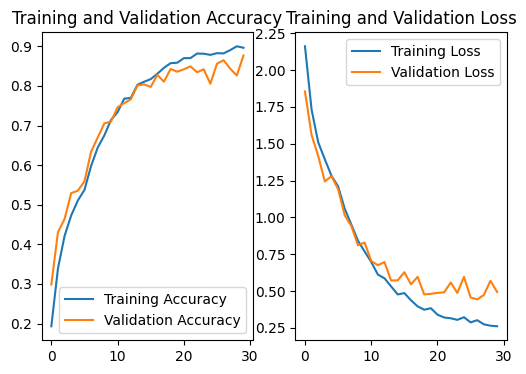

In [104]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6,4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###**Findings:**
1. Compared to the models without Augmentation, the difference between training and validation accuracy has decreased significantly.
2. The same trend can be observed for the validation loss.
3. `Augmenting` the training data has
  - Reduced the overfitting due to imbalance
  - Increased the model accuracy
  - Reduced model overall loss